In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('gapminder_data.csv')
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


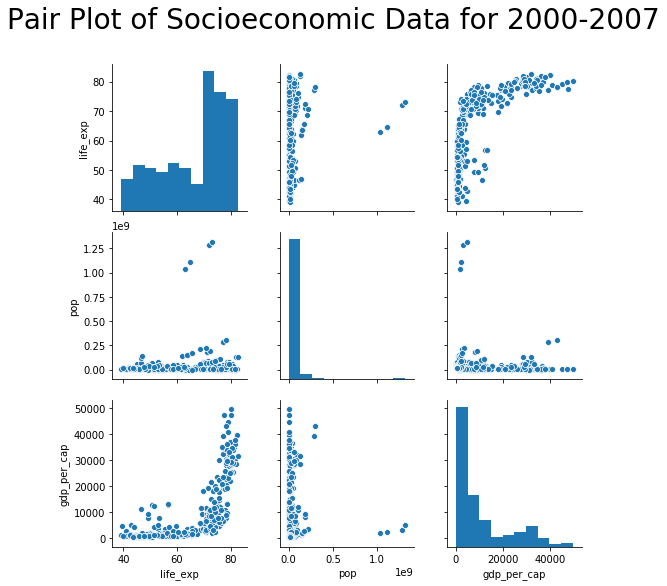

In [3]:
gapminder_pairplot = sns.pairplot(df[df['year'] >= 2000], vars = ['life_exp', 'pop', 'gdp_per_cap'])
gapminder_pairplot.fig.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size = 28, y=1.08);

In [4]:
# Take the log of population and gdp_per_capita
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdp_per_cap'])

# Drop the non-transformed columns
df_logged = df.drop(columns = ['pop', 'gdp_per_cap'])

Text(0.5, 1.08, 'Pair Plot of Socioeconomic Data for 2000-2007')

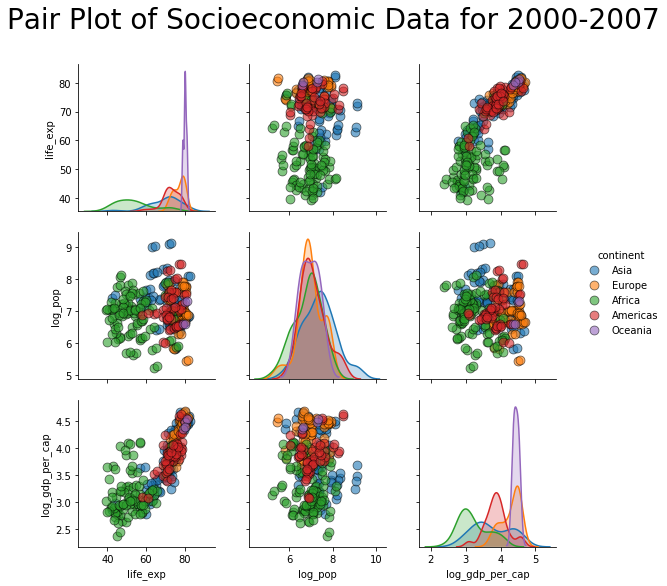

In [5]:
gapminder_pairplot = sns.pairplot(df[df['year'] >= 2000], vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], 
                                  hue = 'continent', diag_kind = 'kde', 
                                  plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 2.5)

gapminder_pairplot.fig.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', y=1.08 ,size=28)

In [6]:
from sklearn import datasets
cars_df = sns.load_dataset("mpg")
cars_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


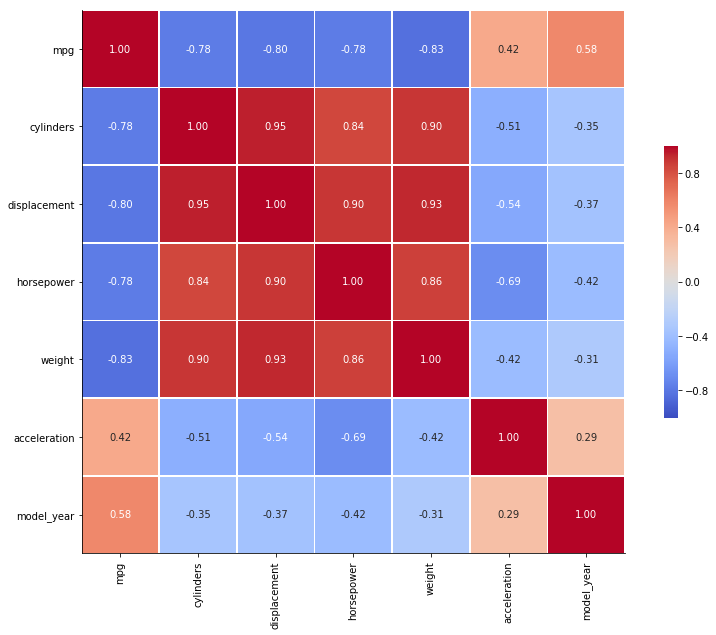

In [64]:
# calculate the correlation matrix
corr = cars_df.corr()

# plot the heatmap
g = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, # change to 'coolwarm', vmax
        square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [8]:
weather_data = pd.read_csv("/Users/afranks/Desktop/weather_data.csv")

# convert weather data to fahrenheit
weather_data = 0.18*weather_data + 32
weather_data = weather_data.T
weather_data

,0,1,2,3,4,5,6,7,8,9,...,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810
11,56.840000,60.440000,81.097143,55.040000,50.900000,56.300,54.86,56.120000,63.320000,57.920000,...,42.08,37.04,46.04,39.02,91.580000,95.90,50.900000,63.500000,86.000000,82.040000
16,63.500000,61.160000,81.097143,50.360000,53.960000,57.920,48.38,53.060000,90.412093,63.500000,...,31.10,29.12,39.92,44.06,86.900000,89.60,39.920000,60.260000,88.160000,80.960000
18,63.140000,59.720000,59.360000,50.000000,49.460000,59.360,41.00,43.160000,90.412093,81.406897,...,27.14,-5.80,26.96,36.14,90.500000,94.28,30.920000,77.000000,88.520000,80.960000
19,61.520000,60.620000,61.340000,51.980000,79.442857,54.860,42.80,44.600000,59.540000,51.980000,...,6.26,-2.74,12.02,14.54,88.340000,93.02,33.260000,74.120000,88.340000,80.060000
27,71.240000,61.700000,61.340000,54.500000,59.900000,55.220,52.16,54.860000,66.920000,81.406897,...,37.04,32.00,37.04,45.14,91.040000,93.20,42.800000,53.060000,88.880000,78.980000
30,60.800000,54.500000,51.440000,37.940000,41.360000,48.920,37.76,44.960000,57.200000,57.920000,...,57.02,25.16,60.08,70.88,94.820000,96.98,30.200000,55.760000,88.880000,80.960000
31,61.340000,62.780000,60.440000,54.500000,79.442857,82.385,54.68,58.640000,63.500000,62.960000,...,53.96,33.98,42.98,62.42,95.000000,97.52,41.180000,61.520000,90.500000,80.960000
33,71.960000,75.416818,45.860000,41.540000,44.600000,82.385,33.44,36.680000,90.412093,60.980000,...,35.96,33.08,33.08,48.74,93.920000,97.16,70.644898,58.280000,87.800000,85.080435
56,88.377674,65.120000,65.300000,62.780000,59.000000,68.000,54.68,59.720000,70.700000,66.560000,...,37.94,24.26,48.92,54.68,102.560000,104.90,50.360000,65.300000,88.880000,80.960000
57,68.900000,61.880000,68.720000,65.300000,79.442857,82.385,56.48,60.620000,69.800000,81.406897,...,33.08,21.20,35.06,41.18,103.820000,105.08,44.600000,51.080000,89.060000,80.960000


In [12]:
def pca(x, space='rows', center=True, scale=False):

    if space=="columns":
        x = x.T
        
    ## Rescale to have mean 0 and Var 1 feagtues
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler(with_mean=center, with_std=scale)
    
    x = sc.fit_transform(x.T).T
    x = x / np.sqrt(x.shape[0]-1)
    
    # PCA is just a singular valude decomposition (SVD) on data matrix
    loading, d, vt = np.linalg.svd(x, full_matrices=False) 
    
    pc = np.diag(d) @ vt

    cpve = d**2 / np.sum(d**2)
   
    return({"pc" : pc, "loading" : loading, "cpve" : cpve})


In [15]:
from sklearn.decomposition import PCA

## PCA function returns a dction
pca_dict = pca(weather_data)

print(pca_dict.keys())

dict_keys(['pc', 'loading', 'pve'])


In [17]:
# sns.scatterplot(pca_dict['pc'])
pc1 = pca_dict['loading'][:, 0]

print(pc1.shape)

(50,)


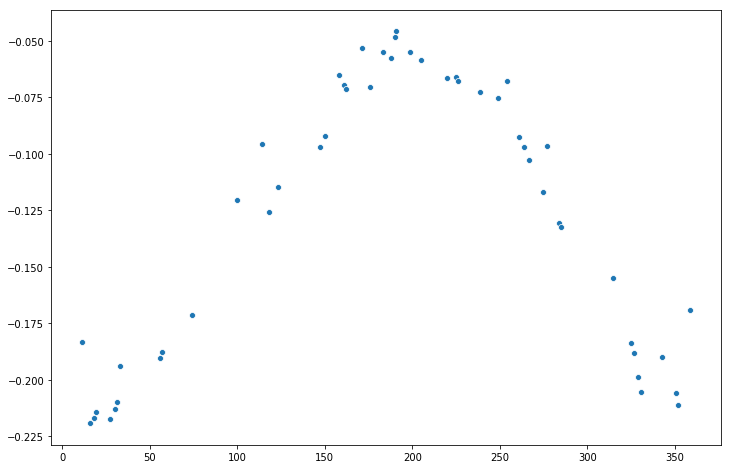

In [42]:
plt.figure(figsize=(12,8))
pca_plot = sns.scatterplot([int(i) for i in weather_data.index.values], 
                           pca_dict['loading'][:, 0])
# plt.xticks(rotation=90)


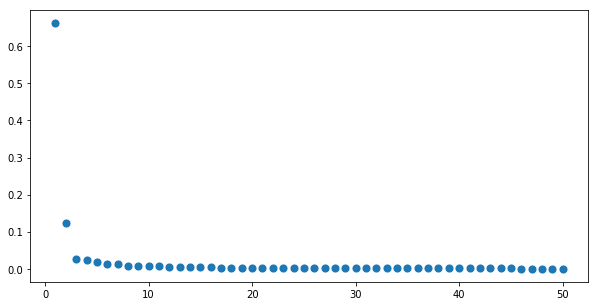

In [55]:
cpve = pca_dict['cpve']
pve_plot = sns.scatterplot(np.linspace(1, len(cpve)), cpve, s=80)
pve_plot.figure.set_size_inches([10, 5])

